In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as scp
import math
import statistics
import seaborn as sns
import sklearn

from matplotlib.patches import Polygon
from scipy.stats import anderson
from scipy.stats import shapiro
from scipy import stats
from statistics import stdev
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
from scipy.stats import pearsonr

#from sklearn import linear_model
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [5]:
#Train Sets
datainput = pd.read_excel("dengue_features_train.xlsx")
dataoutput = pd.read_excel("dengue_labels_train.xlsx")

In [6]:
datainput

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [7]:
dataoutput

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [8]:
df1 = datainput.interpolate(); #not mix nvdi

In [9]:
df2 = df1.assign(ndvi_north = (df1["ndvi_ne"]+df1["ndvi_nw"])/2)
df_mix_ndvi = df2.assign(ndvi_south = (df1["ndvi_se"]+df1["ndvi_sw"])/2)  #mix ndvi
df_mix_ndvi_1 = df_mix_ndvi.replace('sj', 0) 
df_mix_ndvi_2 = df_mix_ndvi_1.replace('iq', 1)
df_mix_ndvi_3 = df_mix_ndvi_2.drop(["ndvi_ne", "ndvi_nw", "ndvi_se", "ndvi_sw","reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","week_start_date","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"], axis=1)
df_mix_ndvi_4 = df_mix_ndvi_3
df_mix_ndvi_4 = df_mix_ndvi_4.assign(total_cases = dataoutput["total_cases"])
df_mix_ndvi_exclude_forcast_value_final = df_mix_ndvi_4.sample(frac=1).reset_index(drop=True)

In [10]:
df2 = df1.assign(ndvi_north = (df1["ndvi_ne"]+df1["ndvi_nw"])/2)
df_mix_ndvi = df2.assign(ndvi_south = (df1["ndvi_se"]+df1["ndvi_sw"])/2)  #mix ndvi
df_mix_ndvi_1 = df_mix_ndvi.replace('sj', 0) 
df_mix_ndvi_2 = df_mix_ndvi_1.replace('iq', 1)
df_mix_ndvi_3 = df_mix_ndvi_2.drop(["ndvi_ne", "ndvi_nw", "ndvi_se", "ndvi_sw","week_start_date"], axis=1)
df_mix_ndvi_4_include_forcast_value = df_mix_ndvi_3
df_mix_ndvi_4_include_forcast_value = df_mix_ndvi_4_include_forcast_value.assign(total_cases = dataoutput["total_cases"])
df_mix_ndvi_include_forcast_value_final = df_mix_ndvi_4_include_forcast_value.sample(frac=1).reset_index(drop=True)

In [11]:
df_normal_data_include_forcast_value_1 = df1.replace('sj', 0) 
df_normal_data_include_forcast_value_2 = df_normal_data_include_forcast_value_1.replace('iq', 1)
df_normal_data_include_forcast_value_2 = df_normal_data_include_forcast_value_2.drop(["week_start_date"], axis=1)
df_normal_data_include_forcast_value_3 = df_normal_data_include_forcast_value_2
df_normal_data_include_forcast_value_3 = df_normal_data_include_forcast_value_3.assign(total_cases = dataoutput["total_cases"])
df_normal_data_include_forcast_value_final = df_normal_data_include_forcast_value_3.sample(frac=1).reset_index(drop=True)

In [12]:
df_normal_data_1 = df1.replace('sj', 0) 
df_normal_data_2 = df_normal_data_1.replace('iq', 1)
df_normal_data_3 = df_normal_data_2.drop(["reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","week_start_date","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"], axis=1)
df_normal_data_4 = df_normal_data_3
df_normal_data_4 = df_normal_data_4.assign(total_cases = dataoutput["total_cases"])
df_normal_data_exclude_forcast_value_final = df_normal_data_4.sample(frac=1).reset_index(drop=True)

In [13]:
features_1 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south']
# Separating out the features
x_1 = df_mix_ndvi_exclude_forcast_value_final.loc[:, features_1].values
# Separating out the target
y_1 = df_mix_ndvi_exclude_forcast_value_final.loc[:,['total_cases']].values
# Standardizing the features
x_1 = StandardScaler().fit_transform(x_1)


#normallized data

In [14]:
features_2 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]
# Separating out the features
x_2 = df_mix_ndvi_include_forcast_value_final.loc[:, features_2].values
# Separating out the target
y_2 = df_mix_ndvi_include_forcast_value_final.loc[:,['total_cases']].values
# Standardizing the features
x_2 = StandardScaler().fit_transform(x_2)


#normallized data

In [15]:
features_3 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']
# Separating out the features
x_3 = df_normal_data_exclude_forcast_value_final.loc[:, features_3].values
# Separating out the target
y_3 = df_normal_data_exclude_forcast_value_final.loc[:,['total_cases']].values
# Standardizing the features
x_3 = StandardScaler().fit_transform(x_3)


#normallized data

In [16]:
features_4 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]
# Separating out the features
x_4 = df_normal_data_include_forcast_value_final.loc[:, features_4].values
# Separating out the target
y_4 = df_normal_data_include_forcast_value_final.loc[:,['total_cases']].values
# Standardizing the features
x_4 = StandardScaler().fit_transform(x_4)



#normallized data

Text(0, 0.5, 'cumulative explained variance')

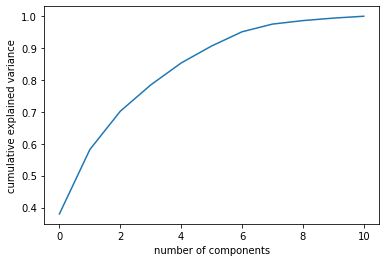

In [17]:
pca_1 = PCA().fit(x_1)
plt.plot(np.cumsum(pca_1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [18]:
pca_1 = PCA(n_components=6)
principalComponents_1 = pca_1.fit_transform(x_1)
principalDf_1 = pd.DataFrame(data = principalComponents_1, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6'])

Text(0, 0.5, 'cumulative explained variance')

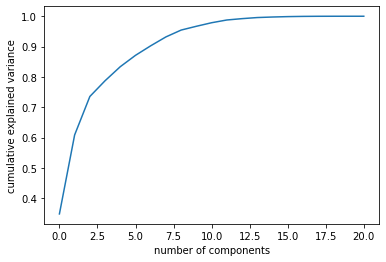

In [19]:
pca_2 = PCA().fit(x_2)
plt.plot(np.cumsum(pca_2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [20]:
pca_2 = PCA(n_components=7)
principalComponents_2 = pca_2.fit_transform(x_2)
principalDf_2 = pd.DataFrame(data = principalComponents_2, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7'])

Text(0, 0.5, 'cumulative explained variance')

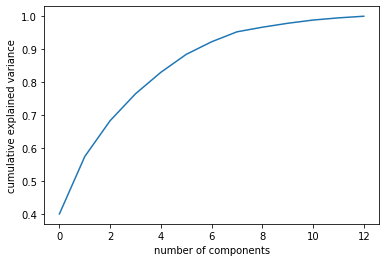

In [21]:
pca_3 = PCA().fit(x_3)
plt.plot(np.cumsum(pca_3.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [22]:
pca_3 = PCA(n_components=8)
principalComponents_3 = pca_3.fit_transform(x_3)
principalDf_3 = pd.DataFrame(data = principalComponents_3, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])

Text(0, 0.5, 'cumulative explained variance')

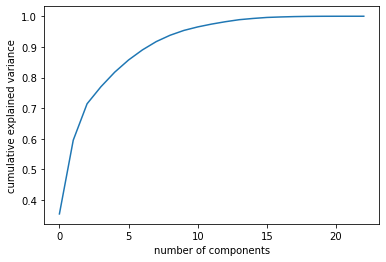

In [23]:
pca_4 = PCA().fit(x_4)
plt.plot(np.cumsum(pca_4.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [24]:
pca_4 = PCA(n_components=10)
principalComponents_4 = pca_4.fit_transform(x_4)
principalDf_4 = pd.DataFrame(data = principalComponents_4, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10'])

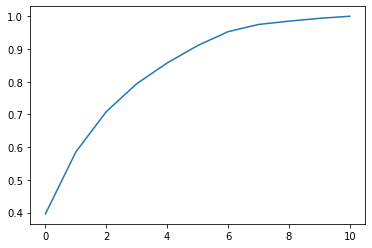

In [25]:
features_smote_1 = ['year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south', 'total_cases']
# Separating out the features
x_smote_1 = df_mix_ndvi_exclude_forcast_value_final.loc[:1164, features_smote_1].values
y_smote_1 = df_mix_ndvi_exclude_forcast_value_final.loc[:1164,['city']].values
sm_1 = SMOTE(random_state=42)
x_sm_1, y_sm_1 = sm_1.fit_resample(x_smote_1,y_smote_1)
temp_x_smote_1 = pd.DataFrame(data = x_sm_1, columns = ['year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south', 'total_cases'])
temp_y_smote_1 = pd.DataFrame(data = y_sm_1, columns = ['city'])
y_smote_1 = temp_x_smote_1['total_cases']
temp_x_smote_1 = temp_x_smote_1.drop(['total_cases'], axis=1)
x_smote_1 = temp_x_smote_1.assign(city = temp_y_smote_1['city']) 


features_smote_1 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south']
# Separating out the features
x_PCA_smote_1 = x_smote_1.loc[:, features_smote_1].values
# Separating out the target

#y_4 = df_normal_data_include_forcast_value_final.loc[:,['total_cases']].values
y_PCA_smote_1 = y_smote_1.values
# Standardizing the features
x_PCA_smote_1 = StandardScaler().fit_transform(x_smote_1)

pca_smote_1 = PCA().fit(x_PCA_smote_1)
plt.plot(np.cumsum(pca_smote_1.explained_variance_ratio_))

In [26]:
pca_smote_final_1 = PCA(n_components=8)
principalComponents_smote_1 = pca_smote_final_1.fit_transform(x_PCA_smote_1)
principalDf_smote_1 = pd.DataFrame(data = principalComponents_smote_1, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])
pca_smote_1 = PCA(n_components=8)
principalComponents_smote_1 = pca_smote_1.fit_transform(x_PCA_smote_1)
principalDf_smote_1 = pd.DataFrame(data = principalComponents_smote_1, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])

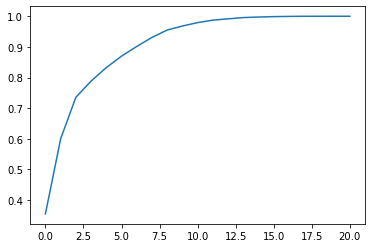

In [28]:
features_smote_2 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k", 'total_cases']
# Separating out the features
x_smote_2 = df_mix_ndvi_include_forcast_value_final.loc[:1164, features_smote_2].values
y_smote_2 = df_mix_ndvi_include_forcast_value_final.loc[:1164,['city']].values
sm_2 = SMOTE(random_state=42)
x_sm_2, y_sm_2 = sm_2.fit_resample(x_smote_2,y_smote_2)
temp_x_smote_2 = pd.DataFrame(data = x_sm_2, columns = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k", 'total_cases'])
temp_y_smote_2 = pd.DataFrame(data = y_sm_2, columns = ['city'])
y_smote_2 = temp_x_smote_2['total_cases']
temp_x_smote_2 = temp_x_smote_2.drop(['total_cases'], axis=1)
x_smote_2 = temp_x_smote_2.assign(city = temp_y_smote_2['city']) 


features_smote_2 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]
# Separating out the features
x_PCA_smote_2 = x_smote_2.loc[:, features_smote_2].values
# Separating out the target

#y_4 = df_normal_data_include_forcast_value_final.loc[:,['total_cases']].values
y_PCA_smote_2 = y_smote_2.values
# Standardizing the features
x_PCA_smote_2 = StandardScaler().fit_transform(x_smote_2)

pca_smote_2 = PCA().fit(x_PCA_smote_2)
plt.plot(np.cumsum(pca_smote_2.explained_variance_ratio_))

In [29]:
pca_smote_final_2 = PCA(n_components=8)
principalComponents_smote_2 = pca_smote_final_2.fit_transform(x_PCA_smote_2)
principalDf_smote_2 = pd.DataFrame(data = principalComponents_smote_2, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])
pca_smote_2 = PCA(n_components=8)
principalComponents_smote_2 = pca_smote_2.fit_transform(x_PCA_smote_2)
principalDf_smote_2 = pd.DataFrame(data = principalComponents_smote_2, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])

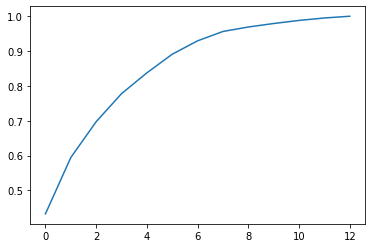

In [30]:
features_smote_3 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw', 'total_cases']
# Separating out the features
x_smote_3 = df_normal_data_exclude_forcast_value_final.loc[:1164, features_smote_3].values
y_smote_3 = df_normal_data_exclude_forcast_value_final.loc[:1164,['city']].values
sm_3 = SMOTE(random_state=42)
x_sm_3, y_sm_3 = sm_3.fit_resample(x_smote_3,y_smote_3)
temp_x_smote_3 = pd.DataFrame(data = x_sm_3, columns = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw', 'total_cases'])
temp_y_smote_3 = pd.DataFrame(data = y_sm_3, columns = ['city'])
y_smote_3 = temp_x_smote_3['total_cases']
temp_x_smote_3 = temp_x_smote_3.drop(['total_cases'], axis=1)
x_smote_3 = temp_x_smote_3.assign(city = temp_y_smote_3['city']) 


features_smote_3 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']
# Separating out the features
x_PCA_smote_3 = x_smote_3.loc[:, features_smote_3].values
# Separating out the target

#y_4 = df_normal_data_include_forcast_value_final.loc[:,['total_cases']].values
y_PCA_smote_3 = y_smote_3.values
# Standardizing the features
x_PCA_smote_3 = StandardScaler().fit_transform(x_smote_3)

pca_smote_3 = PCA().fit(x_PCA_smote_3)
plt.plot(np.cumsum(pca_smote_3.explained_variance_ratio_))

In [31]:
pca_smote_final_3 = PCA(n_components=8)
principalComponents_smote_3 = pca_smote_final_3.fit_transform(x_PCA_smote_3)
principalDf_smote_3 = pd.DataFrame(data = principalComponents_smote_3, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])
pca_smote_3 = PCA(n_components=8)
principalComponents_smote_3 = pca_smote_3.fit_transform(x_PCA_smote_3)
principalDf_smote_3 = pd.DataFrame(data = principalComponents_smote_3, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])

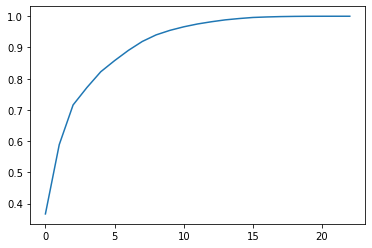

In [33]:
features_smote_4 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k", 'total_cases']
# Separating out the features
x_smote_4 = df_normal_data_include_forcast_value_final.loc[:1164, features_smote_4].values
y_smote_4 = df_normal_data_include_forcast_value_final.loc[:1164,['city']].values
sm_4 = SMOTE(random_state=42)
x_sm_4, y_sm_4 = sm_4.fit_resample(x_smote_4,y_smote_4)
temp_x_smote_4 = pd.DataFrame(data = x_sm_4, columns = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k", 'total_cases'])
temp_y_smote_4 = pd.DataFrame(data = y_sm_4, columns = ['city'])
y_smote_4 = temp_x_smote_4['total_cases']
temp_x_smote_4 = temp_x_smote_4.drop(['total_cases'], axis=1)
x_smote_4 = temp_x_smote_4.assign(city = temp_y_smote_4['city']) 


features_smote_4 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]
# Separating out the features
x_PCA_smote_4 = x_smote_4.loc[:, features_smote_4].values
# Separating out the target

#y_4 = df_normal_data_include_forcast_value_final.loc[:,['total_cases']].values
y_PCA_smote_4 = y_smote_4.values
# Standardizing the features
x_PCA_smote_4 = StandardScaler().fit_transform(x_smote_4)

pca_smote_4 = PCA().fit(x_PCA_smote_4)
plt.plot(np.cumsum(pca_smote_4.explained_variance_ratio_))

In [34]:
pca_smote_final_4 = PCA(n_components=8)
principalComponents_smote_4 = pca_smote_final_4.fit_transform(x_PCA_smote_4)
principalDf_smote_4 = pd.DataFrame(data = principalComponents_smote_4, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])
pca_smote_4 = PCA(n_components=8)
principalComponents_smote_4 = pca_smote_4.fit_transform(x_PCA_smote_4)
principalDf_smote_4 = pd.DataFrame(data = principalComponents_smote_4, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])

In [35]:
grouped_1 = df_mix_ndvi_exclude_forcast_value_final.groupby(df_mix_ndvi_exclude_forcast_value_final["city"])
grouped_2 = df_mix_ndvi_include_forcast_value_final.groupby(df_mix_ndvi_include_forcast_value_final["city"])
grouped_3 = df_normal_data_exclude_forcast_value_final.groupby(df_normal_data_exclude_forcast_value_final["city"])
grouped_4 = df_normal_data_include_forcast_value_final.groupby(df_normal_data_include_forcast_value_final["city"])

df_mix_ndvi_exclude_forcast_value_final_0 = grouped_1.get_group(0)
df_mix_ndvi_exclude_forcast_value_final_1 = grouped_1.get_group(1)

df_mix_ndvi_include_forcast_value_final_0 = grouped_2.get_group(0)
df_mix_ndvi_include_forcast_value_final_1 = grouped_2.get_group(1)

df_normal_data_exclude_forcast_value_final_0 = grouped_3.get_group(0)
df_normal_data_exclude_forcast_value_final_1 = grouped_3.get_group(1)

df_normal_data_include_forcast_value_final_0 = grouped_4.get_group(0)
df_normal_data_include_forcast_value_final_1 = grouped_4.get_group(1)

In [36]:
features_1 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south']
# Separating out the features
x_1_0 = df_mix_ndvi_exclude_forcast_value_final_0.loc[:, features_1].values
# Separating out the target
y_1_0 = df_mix_ndvi_exclude_forcast_value_final_0.loc[:,['total_cases']].values
# Standardizing the features
x_1_0 = StandardScaler().fit_transform(x_1_0)

#normallized data

Text(0, 0.5, 'cumulative explained variance')

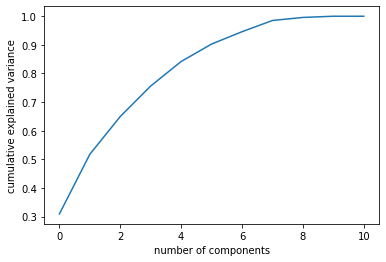

In [37]:
pca_1_0 = PCA().fit(x_1_0)
plt.plot(np.cumsum(pca_1_0.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [38]:
#create train set for model 1
pca_1_0 = PCA(n_components=6)
principalComponents_1_0 = pca_1_0.fit_transform(x_1_0)
principalDf_1_0 = pd.DataFrame(data = principalComponents_1_0, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6'])

df_train_model_PCA_1_0 = principalDf_1_0.iloc[:748,:]
df_test_model_PCA_1_0 = principalDf_1_0.iloc[748:,:]
x_train_model_PCA_1_0 = df_train_model_PCA_1_0[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']]
y_train_model_PCA_1_0 = y_1_0[:748,:]

#create test set for model 1

x_test_model_PCA_1_0 = df_test_model_PCA_1_0[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']]
y_test_model_PCA_1_0 = y_1_0[748:,:]


In [39]:
features_1 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south']
# Separating out the features
x_1_1 = df_mix_ndvi_exclude_forcast_value_final_1.loc[:, features_1].values
# Separating out the target
y_1_1 = df_mix_ndvi_exclude_forcast_value_final_1.loc[:,['total_cases']].values
# Standardizing the features
x_1_1 = StandardScaler().fit_transform(x_1_1)

#normallized data


Text(0, 0.5, 'cumulative explained variance')

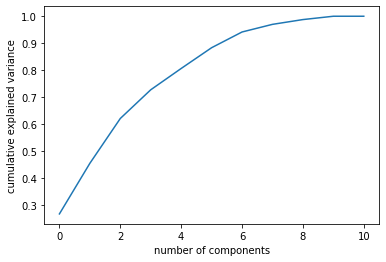

In [40]:
pca_1_1 = PCA().fit(x_1_1)
plt.plot(np.cumsum(pca_1_1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [41]:
#create train set for model 1
pca_1_1 = PCA(n_components=6)
principalComponents_1_1 = pca_1_1.fit_transform(x_1_1)
principalDf_1_1 = pd.DataFrame(data = principalComponents_1_1, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6'])

df_train_model_PCA_1_1 = principalDf_1_1.iloc[:416,:]
df_test_model_PCA_1_1 = principalDf_1_1.iloc[416:,:]
x_train_model_PCA_1_1 = df_train_model_PCA_1_1[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']]
y_train_model_PCA_1_1 = y_1_1[:416,:]


#create test set for model 1

x_test_model_PCA_1_1 = df_test_model_PCA_1_1[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']]
y_test_model_PCA_1_1 = y_1_1[416:,:]


In [42]:
features_2 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]
# Separating out the features
x_2_0 = df_mix_ndvi_include_forcast_value_final_0.loc[:, features_2].values
# Separating out the target
y_2_0 = df_mix_ndvi_include_forcast_value_final_0.loc[:,['total_cases']].values
# Standardizing the features
x_2_0 = StandardScaler().fit_transform(x_2_0)


Text(0, 0.5, 'cumulative explained variance')

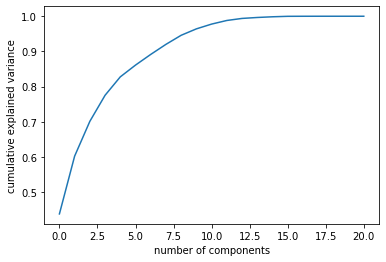

In [43]:
pca_2_0 = PCA().fit(x_2_0)
plt.plot(np.cumsum(pca_2_0.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [44]:
#create train set for model 2
pca_2_0 = PCA(n_components=6)
principalComponents_2_0 = pca_2_0.fit_transform(x_2_0)
principalDf_2_0 = pd.DataFrame(data = principalComponents_2_0, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6'])

df_train_model_PCA_2_0 = principalDf_2_0.iloc[:748,:]
df_test_model_PCA_2_0 = principalDf_2_0.iloc[748:,:]
x_train_model_PCA_2_0 = df_train_model_PCA_2_0[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']]
y_train_model_PCA_2_0 = y_2_0[:748,:]


#create test set for model 1

x_test_model_PCA_2_0 = df_test_model_PCA_2_0[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6']]
y_test_model_PCA_2_0 = y_2_0[748:,:]


In [45]:
features_2 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_north','ndvi_south',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]
# Separating out the features
x_2_1 = df_mix_ndvi_include_forcast_value_final_1.loc[:, features_2].values
# Separating out the target
y_2_1 = df_mix_ndvi_include_forcast_value_final_1.loc[:,['total_cases']].values
# Standardizing the features
x_2_1 = StandardScaler().fit_transform(x_2_1)

#normallized data

Text(0, 0.5, 'cumulative explained variance')

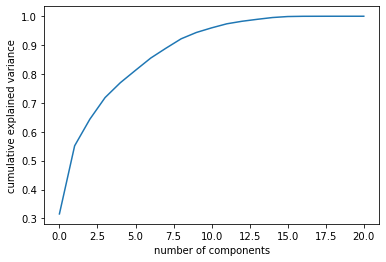

In [46]:
pca_2_1 = PCA().fit(x_2_1)
plt.plot(np.cumsum(pca_2_1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [47]:
#create train set for model 1
pca_2_1 = PCA(n_components=8)
principalComponents_2_1 = pca_2_1.fit_transform(x_2_1)
principalDf_2_1 = pd.DataFrame(data = principalComponents_2_1, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])

df_train_model_PCA_2_1 = principalDf_2_1.iloc[:416,:]
df_test_model_PCA_2_1 = principalDf_2_1.iloc[416:,:]
x_train_model_PCA_2_1 = df_train_model_PCA_2_1[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_train_model_PCA_2_1 = y_2_1[:416,:]


#create test set for model 1

x_test_model_PCA_2_1 = df_test_model_PCA_2_1[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_test_model_PCA_2_1 = y_2_1[416:,:]


In [48]:
features_3 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']
# Separating out the features
x_3_0 = df_normal_data_exclude_forcast_value_final_0.loc[:, features_3].values
# Separating out the target
y_3_0 = df_normal_data_exclude_forcast_value_final_0.loc[:,['total_cases']].values
# Standardizing the features
x_3_0 = StandardScaler().fit_transform(x_3_0)


Text(0, 0.5, 'cumulative explained variance')

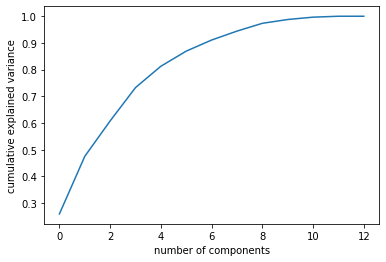

In [49]:
pca_3_0 = PCA().fit(x_3_0)
plt.plot(np.cumsum(pca_3_0.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [50]:
#create train set for model 2
pca_3_0 = PCA(n_components=8)
principalComponents_3_0 = pca_3_0.fit_transform(x_3_0)
principalDf_3_0 = pd.DataFrame(data = principalComponents_3_0, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])

df_train_model_PCA_3_0 = principalDf_3_0.iloc[:748,:]
df_test_model_PCA_3_0 = principalDf_3_0.iloc[748:,:]
x_train_model_PCA_3_0 = df_train_model_PCA_3_0[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_train_model_PCA_3_0 = y_3_0[:748,:]


#create test set for model 1

x_test_model_PCA_3_0 = df_test_model_PCA_3_0[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_test_model_PCA_3_0 = y_3_0[748:,:]


In [51]:
features_3 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']
# Separating out the features
x_3_1 = df_normal_data_exclude_forcast_value_final_1.loc[:, features_3].values
# Separating out the target
y_3_1 = df_normal_data_exclude_forcast_value_final_1.loc[:,['total_cases']].values
# Standardizing the features
x_3_1 = StandardScaler().fit_transform(x_3_1)

#normallized data

Text(0, 0.5, 'cumulative explained variance')

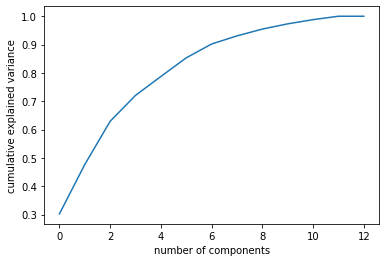

In [52]:
pca_3_1 = PCA().fit(x_3_1)
plt.plot(np.cumsum(pca_3_1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [53]:
#create train set for model 1
pca_3_1 = PCA(n_components=8)
principalComponents_3_1 = pca_3_1.fit_transform(x_3_1)
principalDf_3_1 = pd.DataFrame(data = principalComponents_3_1, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])

df_train_model_PCA_3_1 = principalDf_3_1.iloc[:416,:]
df_test_model_PCA_3_1 = principalDf_3_1.iloc[416:,:]
x_train_model_PCA_3_1 = df_train_model_PCA_3_1[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_train_model_PCA_3_1 = y_3_1[:416,:]


#create test set for model 1

x_test_model_PCA_3_1 = df_test_model_PCA_3_1[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_test_model_PCA_3_1 = y_3_1[416:,:]


In [54]:
features_4 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]
# Separating out the features
x_4_0 = df_normal_data_include_forcast_value_final_0.loc[:, features_4].values
# Separating out the target
y_4_0 = df_normal_data_include_forcast_value_final_0.loc[:,['total_cases']].values
# Standardizing the features
x_4_0 = StandardScaler().fit_transform(x_4_0)

Text(0, 0.5, 'cumulative explained variance')

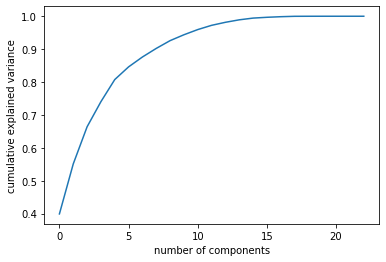

In [55]:
pca_4_0 = PCA().fit(x_4_0)
plt.plot(np.cumsum(pca_4_0.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [56]:
#create train set for model 2
pca_4_0 = PCA(n_components=8)
principalComponents_4_0 = pca_4_0.fit_transform(x_4_0)
principalDf_4_0 = pd.DataFrame(data = principalComponents_4_0, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])

df_train_model_PCA_4_0 = principalDf_4_0.iloc[:748,:]
df_test_model_PCA_4_0 = principalDf_4_0.iloc[748:,:]
x_train_model_PCA_4_0 = df_train_model_PCA_4_0[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_train_model_PCA_4_0 = y_4_0[:748,:]


#create test set for model 1

x_test_model_PCA_4_0 = df_test_model_PCA_4_0[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_test_model_PCA_4_0 = y_4_0[748:,:]


In [57]:
features_4 = ['city','year','weekofyear','precipitation_amt_mm','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw',"reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k","reanalysis_max_air_temp_k", "reanalysis_min_air_temp_k","reanalysis_sat_precip_amt_mm","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent", "reanalysis_specific_humidity_g_per_kg", "reanalysis_tdtr_k"]
# Separating out the features
x_4_1 = df_normal_data_include_forcast_value_final_1.loc[:, features_4].values
# Separating out the target
y_4_1 = df_normal_data_include_forcast_value_final_1.loc[:,['total_cases']].values
# Standardizing the features
x_4_1 = StandardScaler().fit_transform(x_4_1)

#normallized data

Text(0, 0.5, 'cumulative explained variance')

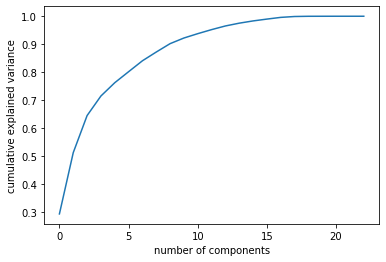

In [58]:
pca_4_1 = PCA().fit(x_4_1)
plt.plot(np.cumsum(pca_4_1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [59]:
#create train set for model 1
pca_4_1 = PCA(n_components=8)
principalComponents_4_1 = pca_4_1.fit_transform(x_4_1)
principalDf_4_1 = pd.DataFrame(data = principalComponents_4_1, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8'])

df_train_model_PCA_4_1 = principalDf_4_1.iloc[:416,:]
df_test_model_PCA_4_1 = principalDf_4_1.iloc[416:,:]
x_train_model_PCA_4_1 = df_train_model_PCA_4_1[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_train_model_PCA_4_1 = y_4_1[:416,:]


#create test set for model 1

x_test_model_PCA_4_1 = df_test_model_PCA_4_1[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']]
y_test_model_PCA_4_1 = y_4_1[416:,:]


In [62]:
from sklearn.metrics import mean_absolute_error


In [63]:
#Poission Distribution Model
poisson_PCA_1_0 = linear_model.PoissonRegressor()
poisson_PCA_1_0.fit(x_train_model_PCA_1_0, y_train_model_PCA_1_0)

y_pred_model_PCA_1_0 = poisson_PCA_1_0.predict(x_test_model_PCA_1_0)
y_test_array_model_PCA_1_0 = y_test_model_PCA_1_0


print("Coefficients: \n", poisson_PCA_1_0)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_1_0, y_pred_model_PCA_1_0))
print("Mean absoulte error: %.2f" % mean_absolute_error(y_test_array_model_PCA_1_0, y_pred_model_PCA_1_0))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_1_0, y_pred_model_PCA_1_0))

Coefficients: 
 PoissonRegressor()
Mean squared error: 1611.02
Mean absoulte error: 25.42
Coefficient of determination: 0.16


C:\Users\pasit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
#Poission Distribution Model
poisson_PCA_1_1 = linear_model.PoissonRegressor()
poisson_PCA_1_1.fit(x_train_model_PCA_1_1, y_train_model_PCA_1_1)

y_pred_model_PCA_1_1 = poisson_PCA_1_1.predict(x_test_model_PCA_1_1)
y_test_array_model_PCA_1_1 = y_test_model_PCA_1_1


print("Coefficients: \n", poisson_PCA_1_1)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_1_1, y_pred_model_PCA_1_1))
print("Mean absoulte error: %.2f" % mean_absolute_error(y_test_array_model_PCA_1_1, y_pred_model_PCA_1_1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_1_1, y_pred_model_PCA_1_1))

Coefficients: 
 PoissonRegressor()
Mean squared error: 89.76
Mean absoulte error: 6.72
Coefficient of determination: 0.02


C:\Users\pasit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
#Poission Distribution Model
poisson_PCA_2_0 = linear_model.PoissonRegressor()
poisson_PCA_2_0.fit(x_train_model_PCA_2_0, y_train_model_PCA_2_0)

y_pred_model_PCA_2_0 = poisson_PCA_2_0.predict(x_test_model_PCA_2_0)
y_test_array_model_PCA_2_0 = y_test_model_PCA_2_0


print("Coefficients: \n", poisson_PCA_2_0)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_2_0, y_pred_model_PCA_2_0))
print("Mean absoulte error: %.2f" % mean_absolute_error(y_test_array_model_PCA_1_0, y_pred_model_PCA_2_0))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_2_0, y_pred_model_PCA_2_0))

Coefficients: 
 PoissonRegressor()
Mean squared error: 2953.09
Mean absoulte error: 28.47
Coefficient of determination: 0.15


C:\Users\pasit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
#Poission Distribution Model
poisson_PCA_2_1 = linear_model.PoissonRegressor()
poisson_PCA_2_1.fit(x_train_model_PCA_2_1, y_train_model_PCA_2_1)

y_pred_model_PCA_2_1 = poisson_PCA_2_1.predict(x_test_model_PCA_2_1)
y_test_array_model_PCA_2_1 = y_test_model_PCA_2_1


print("Coefficients: \n", poisson_PCA_2_1)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_2_1, y_pred_model_PCA_2_1))
print("Mean absoulte error: %.2f" % mean_absolute_error(y_test_array_model_PCA_2_1, y_pred_model_PCA_2_1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_2_1, y_pred_model_PCA_2_1))

Coefficients: 
 PoissonRegressor()
Mean squared error: 67.50
Mean absoulte error: 5.94
Coefficient of determination: 0.11


C:\Users\pasit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
#Poission Distribution Model
poisson_PCA_3_0 = linear_model.PoissonRegressor()
poisson_PCA_3_0.fit(x_train_model_PCA_3_0, y_train_model_PCA_3_0)

y_pred_model_PCA_3_0 = poisson_PCA_3_0.predict(x_test_model_PCA_3_0)
y_test_array_model_PCA_3_0 = y_test_model_PCA_3_0


print("Coefficients: \n", poisson_PCA_3_0)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_3_0, y_pred_model_PCA_3_0))
print("Mean absoulte error: %.2f" % mean_absolute_error(y_test_array_model_PCA_3_0, y_pred_model_PCA_3_0))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_3_0, y_pred_model_PCA_3_0))

Coefficients: 
 PoissonRegressor()
Mean squared error: 3593.53
Mean absoulte error: 29.37
Coefficient of determination: 0.16


C:\Users\pasit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
#Poission Distribution Model
poisson_PCA_3_1 = linear_model.PoissonRegressor()
poisson_PCA_3_1.fit(x_train_model_PCA_3_1, y_train_model_PCA_3_1)

y_pred_model_PCA_3_1 = poisson_PCA_3_1.predict(x_test_model_PCA_3_1)
y_test_array_model_PCA_3_1 = y_test_model_PCA_3_1


print("Coefficients: \n", poisson_PCA_3_1)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_3_1, y_pred_model_PCA_3_1))
print("Mean absoulte error: %.2f" % mean_absolute_error(y_test_array_model_PCA_3_1, y_pred_model_PCA_3_1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_3_1, y_pred_model_PCA_3_1))

Coefficients: 
 PoissonRegressor()
Mean squared error: 148.75
Mean absoulte error: 6.03
Coefficient of determination: 0.03


C:\Users\pasit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
#Poission Distribution Model
poisson_PCA_4_0 = linear_model.PoissonRegressor()
poisson_PCA_4_0.fit(x_train_model_PCA_4_0, y_train_model_PCA_4_0)

y_pred_model_PCA_4_0 = poisson_PCA_4_0.predict(x_test_model_PCA_4_0)
y_test_array_model_PCA_4_0 = y_test_model_PCA_1_0


print("Coefficients: \n", poisson_PCA_4_0)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_4_0, y_pred_model_PCA_4_0))
print("Mean absoulte error: %.2f" % mean_absolute_error(y_test_array_model_PCA_4_0, y_pred_model_PCA_4_0))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_4_0, y_pred_model_PCA_4_0))

Coefficients: 
 PoissonRegressor()
Mean squared error: 2439.99
Mean absoulte error: 32.26
Coefficient of determination: -0.27


C:\Users\pasit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
#Poission Distribution Model
poisson_PCA_4_1 = linear_model.PoissonRegressor()
poisson_PCA_4_1.fit(x_train_model_PCA_4_1, y_train_model_PCA_4_1)

y_pred_model_PCA_4_1 = poisson_PCA_4_1.predict(x_test_model_PCA_4_1)
y_test_array_model_PCA_4_1 = y_test_model_PCA_4_1


print("Coefficients: \n", poisson_PCA_4_1)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_4_1, y_pred_model_PCA_4_1))
print("Mean absoulte error: %.2f" % mean_absolute_error(y_test_array_model_PCA_4_1, y_pred_model_PCA_4_1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_4_1, y_pred_model_PCA_4_1))

Coefficients: 
 PoissonRegressor()
Mean squared error: 209.15
Mean absoulte error: 6.75
Coefficient of determination: 0.04


C:\Users\pasit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
#Decision Trees Model
dt_PCA_1_0 = DecisionTreeRegressor()
dt_PCA_1_0.fit(x_train_model_PCA_1_0, y_train_model_PCA_1_0)

y_pred_model_PCA_1_0 = dt_PCA_1_0.predict(x_test_model_PCA_1_0)
y_test_array_model_PCA_1_0 = y_test_model_PCA_1_0


print("Coefficients: \n", dt_PCA_1_0)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_1_0, y_pred_model_PCA_1_0))
print("Mean absoulte error: %.2f" % mean_absolute_error(y_test_array_model_PCA_1_0, y_pred_model_PCA_1_0))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_1_0, y_pred_model_PCA_1_0))

Coefficients: 
 DecisionTreeRegressor()
Mean squared error: 2640.82
Mean absoulte error: 29.12
Coefficient of determination: -0.38


In [73]:
#Decision Trees Model
dt_PCA_1_1 = DecisionTreeRegressor()
dt_PCA_1_1.fit(x_train_model_PCA_1_1, y_train_model_PCA_1_1)

y_pred_model_PCA_1_1 = dt_PCA_1_1.predict(x_test_model_PCA_1_1)
y_test_array_model_PCA_1_1 = y_test_model_PCA_1_1


print("Coefficients: \n", dt_PCA_1_1)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_1_1, y_pred_model_PCA_1_1))
print("Mean absoulte error: %.2f" % mean_absolute_error(y_test_array_model_PCA_1_1, y_pred_model_PCA_1_1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_1_1, y_pred_model_PCA_1_1))

Coefficients: 
 DecisionTreeRegressor()
Mean squared error: 618.43
Mean absoulte error: 12.78
Coefficient of determination: -5.74


In [74]:
#Decision Trees Model
dt_PCA_2_0 = DecisionTreeRegressor()
dt_PCA_2_0.fit(x_train_model_PCA_2_0, y_train_model_PCA_2_0)

y_pred_model_PCA_2_0 = dt_PCA_2_0.predict(x_test_model_PCA_2_0)
y_test_array_model_PCA_2_0 = y_test_model_PCA_2_0


print("Coefficients: \n", dt_PCA_2_0)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_2_0, y_pred_model_PCA_2_0))
print("Mean absoulte error: %.2f" % mean_absolute_error(y_test_array_model_PCA_1_0, y_pred_model_PCA_2_0))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_2_0, y_pred_model_PCA_2_0))

Coefficients: 
 DecisionTreeRegressor()
Mean squared error: 6107.03
Mean absoulte error: 41.70
Coefficient of determination: -0.77


In [75]:
#Decision Trees Model
dt_PCA_2_1 = DecisionTreeRegressor()
dt_PCA_2_1.fit(x_train_model_PCA_2_1, y_train_model_PCA_2_1)

y_pred_model_PCA_2_1 = dt_PCA_2_1.predict(x_test_model_PCA_2_1)
y_test_array_model_PCA_2_1 = y_test_model_PCA_2_1


print("Coefficients: \n", dt_PCA_2_1)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_2_1, y_pred_model_PCA_2_1))
print("Mean absoulte error: %.2f" % mean_absolute_error(y_test_array_model_PCA_2_1, y_pred_model_PCA_2_1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_2_1, y_pred_model_PCA_2_1))

Coefficients: 
 DecisionTreeRegressor()
Mean squared error: 347.41
Mean absoulte error: 9.66
Coefficient of determination: -3.58


In [76]:
#Decision Trees Model
dt_PCA_3_0 = DecisionTreeRegressor()
dt_PCA_3_0.fit(x_train_model_PCA_3_0, y_train_model_PCA_3_0)

y_pred_model_PCA_3_0 = dt_PCA_3_0.predict(x_test_model_PCA_3_0)
y_test_array_model_PCA_3_0 = y_test_model_PCA_3_0


print("Coefficients: \n", dt_PCA_3_0)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_3_0, y_pred_model_PCA_3_0))
print("Mean absoulte error: %.2f" % mean_absolute_error(y_test_array_model_PCA_3_0, y_pred_model_PCA_3_0))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_3_0, y_pred_model_PCA_3_0))

Coefficients: 
 DecisionTreeRegressor()
Mean squared error: 5782.84
Mean absoulte error: 41.18
Coefficient of determination: -0.35


In [77]:
#Decision Trees Model
dt_PCA_3_1 = DecisionTreeRegressor()
dt_PCA_3_1.fit(x_train_model_PCA_3_1, y_train_model_PCA_3_1)

y_pred_model_PCA_3_1 = dt_PCA_3_1.predict(x_test_model_PCA_3_1)
y_test_array_model_PCA_3_1 = y_test_model_PCA_3_1


print("Coefficients: \n", dt_PCA_3_1)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_3_1, y_pred_model_PCA_3_1))
print("Mean absoulte error: %.2f" % mean_absolute_error(y_test_array_model_PCA_3_1, y_pred_model_PCA_3_1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_3_1, y_pred_model_PCA_3_1))

Coefficients: 
 DecisionTreeRegressor()
Mean squared error: 230.84
Mean absoulte error: 7.49
Coefficient of determination: -0.51


In [78]:
#Decision Trees Model
dt_PCA_4_0 = DecisionTreeRegressor()
dt_PCA_4_0.fit(x_train_model_PCA_4_0, y_train_model_PCA_4_0)

y_pred_model_PCA_1_0 = dt_PCA_4_0.predict(x_test_model_PCA_4_0)
y_test_array_model_PCA_4_0 = y_test_model_PCA_1_0


print("Coefficients: \n", dt_PCA_4_0)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_4_0, y_pred_model_PCA_4_0))
print("Mean absoulte error: %.2f" % mean_absolute_error(y_test_array_model_PCA_4_0, y_pred_model_PCA_4_0))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_4_0, y_pred_model_PCA_4_0))

Coefficients: 
 DecisionTreeRegressor()
Mean squared error: 2439.99
Mean absoulte error: 32.26
Coefficient of determination: -0.27


In [79]:
#Decision Trees Model
dt_PCA_4_1 = DecisionTreeRegressor()
dt_PCA_4_1.fit(x_train_model_PCA_4_1, y_train_model_PCA_4_1)

y_pred_model_PCA_4_1 = dt_PCA_4_1.predict(x_test_model_PCA_4_1)
y_test_array_model_PCA_4_1 = y_test_model_PCA_4_1


print("Coefficients: \n", dt_PCA_4_1)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_array_model_PCA_4_1, y_pred_model_PCA_4_1))
print("Mean absoulte error: %.2f" % mean_absolute_error(y_test_array_model_PCA_4_1, y_pred_model_PCA_4_1))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_array_model_PCA_4_1, y_pred_model_PCA_4_1))

Coefficients: 
 DecisionTreeRegressor()
Mean squared error: 257.86
Mean absoulte error: 8.07
Coefficient of determination: -0.18
